In [1]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
cat4_img=cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4_img=cv2.cvtColor(cat4_img,cv2.COLOR_BGR2RGB)

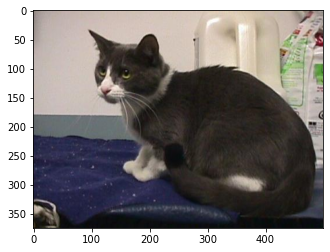

In [4]:
plt.imshow(cat4_img)

In [5]:
cat4_img.shape

(375, 500, 3)

In [6]:
dog2_img=cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog2_img=cv2.cvtColor(dog2_img,cv2.COLOR_BGR2RGB)

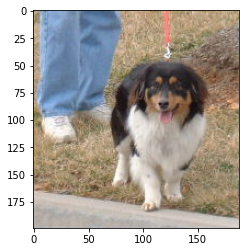

In [8]:
plt.imshow(dog2_img)

In [9]:
dog2_img.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                                   zoom_range=0.20,horizontal_flip=True,fill_mode='nearest')

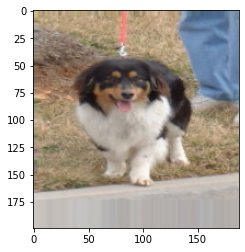

In [12]:
plt.imshow(image_generator.random_transform(dog2_img))

In [13]:
image_generator.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
from keras.models import Sequential

In [15]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128))
model.add(Activation('relu'))

In [22]:
model.add(Dropout(0.5))

In [23]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [26]:
#train the model
input_shape=(150,150,3)

In [27]:
batch_size=16
train_image_generator=image_generator.flow_from_directory('CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 18743 images belonging to 2 classes.


In [28]:
test_image_generator=image_generator.flow_from_directory('CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,
                                                         class_mode='binary')

Found 6251 images belonging to 2 classes.


In [29]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
results=model.fit(train_image_generator,epochs=100,steps_per_epoch=150,validation_data=test_image_generator,
                           validation_steps=12)

Epoch 1/100
150/150 [==============================] - 51s 333ms/step - loss: 0.7609 - accuracy: 0.4946 - val_loss: 0.6854 - val_accuracy: 0.5469
Epoch 2/100
150/150 [==============================] - 50s 331ms/step - loss: 0.6923 - accuracy: 0.5130 - val_loss: 0.6904 - val_accuracy: 0.5781
Epoch 3/100
150/150 [==============================] - 49s 327ms/step - loss: 0.6908 - accuracy: 0.5340 - val_loss: 0.6802 - val_accuracy: 0.5729
Epoch 4/100
150/150 [==============================] - 48s 318ms/step - loss: 0.6863 - accuracy: 0.5345 - val_loss: 0.6804 - val_accuracy: 0.5312
Epoch 5/100
150/150 [==============================] - 48s 317ms/step - loss: 0.6890 - accuracy: 0.5420 - val_loss: 0.6705 - val_accuracy: 0.5938
Epoch 6/100
150/150 [==============================] - 48s 317ms/step - loss: 0.6857 - accuracy: 0.5239 - val_loss: 0.6762 - val_accuracy: 0.5833
Epoch 7/100
150/150 [==============================] - 48s 317ms/step - loss: 0.6831 - accuracy: 0.5661 - val_loss: 0.6683 -

In [43]:
model.save('cat_vs_dog.h5')

In [31]:
results.history['accuracy']

[0.4933333396911621,
 0.5120833516120911,
 0.550000011920929,
 0.5224999785423279,
 0.5533333420753479,
 0.5353408455848694,
 0.5633333325386047,
 0.559583306312561,
 0.5799999833106995,
 0.5541666746139526,
 0.5441666841506958,
 0.5870833396911621,
 0.5774999856948853,
 0.5933333039283752,
 0.5679166913032532,
 0.6162499785423279,
 0.6112499833106995,
 0.6262500286102295,
 0.6474999785423279,
 0.6504166722297668,
 0.6491666436195374,
 0.6612296104431152,
 0.653333306312561,
 0.6625000238418579,
 0.675000011920929,
 0.6770833134651184,
 0.6949999928474426,
 0.6995833516120911,
 0.6891666650772095,
 0.7200000286102295,
 0.6945833563804626,
 0.7049999833106995,
 0.7170833349227905,
 0.7245833277702332,
 0.7394395470619202,
 0.7254166603088379,
 0.7350000143051147,
 0.7362499833106995,
 0.73416668176651,
 0.7475000023841858,
 0.7433333396911621,
 0.752916693687439,
 0.7458333373069763,
 0.7579166889190674,
 0.7450000047683716,
 0.7674999833106995,
 0.7429166436195374,
 0.7570833563804626,

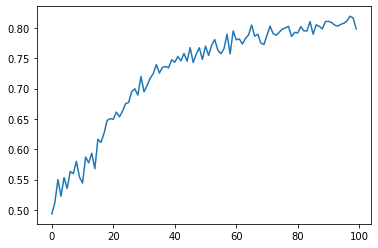

In [32]:
plt.plot(results.history['accuracy'])

In [33]:
#predict on new image

In [34]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [35]:
import numpy as np
from keras.preprocessing import image

In [36]:
dog_img_2 = 'CATS_DOGS/train/Dog/5.jpg'

In [37]:
dog_img = image.load_img(dog_img_2, target_size=(150, 150))

In [38]:
dog_img = image.img_to_array(dog_img)

In [39]:
dog_img = np.expand_dims(dog_img, axis=0)

In [40]:
dog_img = dog_img/255

In [41]:
prediction_prob = model.predict(dog_img)

In [44]:
print(f'Probability that image is a dog is: {prediction_prob}')

Probability that image is a dog is: [[0.9869486]]


Reference: https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html